## Human Activity Revognition with Smartphones

[参考URL](https://github.com/MadhavShashi/Human-Activity-Recognition-Using-Smartphones-Sensor-DataSet/blob/master/1.HumanActivityRecognition_EDA.ipynb)


> 本プロジェクトは、歩行、歩行_上、歩行_下、座位、立位、寝位などの人間活動を予測するモデルを構築するものである。
30名の参加者（本データセットでは被験者と呼ぶ）は、腰に装着したスマートフォンを持ちながら、日常生活活動を行った。スマートフォンは2つのセンサ（加速度センサとジャイロセンサ）を搭載し、記録するように設定した。これらの時系列に対して、基礎研究の責任者が特徴生成を行い、2.56秒の固定幅のウィンドウを移動させることでデータセットを生成した。窓の重なりは50%であるため、得られる点は等間隔（1.28s）である。この実験は、データを手動でラベル付けするためにビデオ録画された。


In [2]:
import numpy as np
import pandas as pd

# get the features from the features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


### Get the train data

In [3]:
# get the from txt file to pandas dataframe
# delim_whitespace=Trueは空白文字を区切り文字に指定
# header=Noneで１行目をheaderにしない
X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None)
display(X_train)
X_train.columns = [features]
display(X_train)

# add subject column to the dataframe
# squeeze=Trueにすると読み込んだデータが1列だけのデータだったときにDataFrameではなくSeriesとして返すようになる
X_train['subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_68898/4068537275.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_train['subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)
/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_68898/4068537275.py:13: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
3827,0.265288,-0.007658,-0.108109,-0.982853,-0.952198,-0.993500,-0.984087,-0.947997,-0.993829,-0.934036,...,-0.215967,0.287714,0.210783,-0.122070,0.109349,-0.359907,-0.498545,19,4,SITTING
1242,0.345246,-0.032239,-0.106417,-0.210913,0.267127,-0.355168,-0.282114,0.280622,-0.395939,0.067702,...,-0.804986,0.467884,0.377168,-0.475835,-0.784687,0.243478,-0.015125,6,1,WALKING


In [4]:
train.shape

(7352, 564)

### Get the test data

In [6]:
# get the data from txt files to pandas dataframe
X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]

display(X_test)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})

# put all columns in a single dataframe
# X_testは参照なのでそのままやっても同様
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

display(X_test)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_68898/1178774999.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_test['subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)
/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_68898/1178774999.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2,WALKING_UPSTAIRS


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2,WALKING_UPSTAIRS


In [ ]:
test.shape

### Time to Data Cleaning

#### 1. Check for Duplecates

In [8]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test: {}'.format(sum(test.duplicated())))

/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_68898/1701265507.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print('No of duplicates in train: {}'.format(sum(train.duplicated())))


No of duplicates in train: 0


/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_68898/1701265507.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  print('No of duplicates in test: {}'.format(sum(test.duplicated())))


No of duplicates in test: 0


#### 2. Checking for Nan/null values

In [9]:
print('No of duplicates in train: {}'.format(train.isnull().values.sum()))
print('No of duplicates in test: {}'.format(test.isnull().values.sum()))

No of duplicates in train: 0
No of duplicates in test: 0


#### 3. Save thhis dataframe in a csv files

In [11]:
# index=Falseで行番号を消せる
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

### Exploratory Data Analysis

#### Obrtain the train and test data

In [1]:
train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

NameError: name 'pd' is not defined

#### All the feature name with lots of unnecessary singhs: Changing feature names
> 特徴量の名前の変更

In [18]:
columns = train.columns

print(columns)

# Removing "()" from columns names
columns = columns.str.replace('[()]', '')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]', '')

train.columns = columns
test.columns = columns

print(test.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)
Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject',

/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_68898/3868284805.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]', '')
/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_68898/3868284805.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_68898/3868284805.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]', '')


#### 1. investigate participants activity durations.
> このデータセットは科学的な環境で作成されているため、参加者の前提条件がほぼ同じであると考えられる。ほぼ全ての参加者が、下階よりも上階を歩くデータを多く持っています。上りと下りの回数が同じだとすると、上りの方が長く歩くことになります。

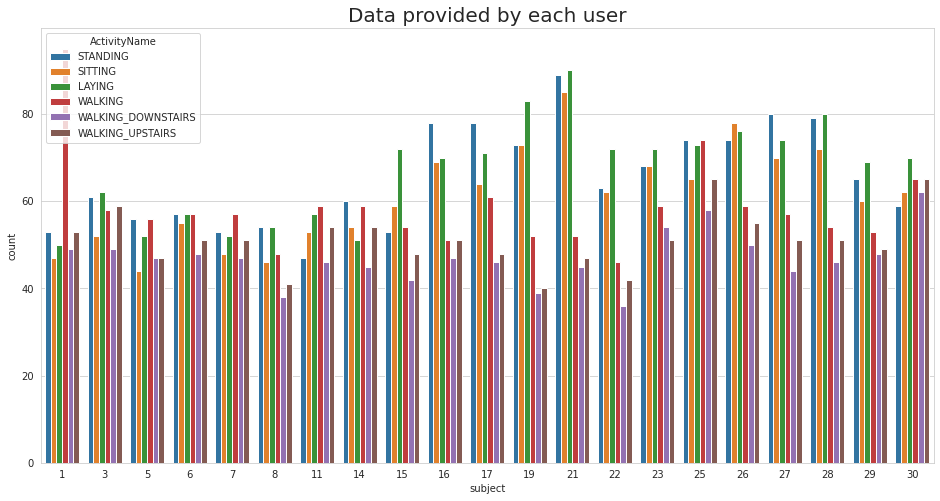

In [29]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

# グラフのスタイル指定
sns.set_style('whitegrid')
# 文字フォント指定
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16, 8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject', hue='ActivityName', data=train)
plt.show()

#### How Are The ActivityName Distributed?
> activityはどのように分布している？

In [35]:
# Plotlyではインタラクティブな可視化が可能
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# plotting data
label_counts = train['ActivityName'].value_counts()

print(label_counts)

# Get colors
n = label_counts.shape[0]
# カラーマップで色を指定
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

print(colors)

# Create plot
# 棒グラフにデータを格納
data= go.Bar(x=label_counts.index, y=label_counts, marker=dict(color=colors))

layout = go.Layout(title='Smartphone ActivityName Distribution', xaxis=dict(title='ActivityName'), yaxis=dict(title='Count'))

# dataに格納されたグラフ情報をもとにグラフを作成
fig = go.Figure(data=[data], layout=layout)
fig.show()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64
['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']


#### 2. Featuring Engineering from Domain Knowledge
- Static and Dynamic Activities
    - In static activities (sit, stand, lie down) motion information will not be very useful.
    - In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

> ドメイン知識からの特徴的なエンジニアリング<br>
> 静的な活動（座る、立つ、横になる）では、動作情報はあまり意味がない。<br>
> 動的な活動（歩く、階段を上る、階段を下りる）では、動作情報は重要である。

#### 3. Stationary and Moving activities are completely different
> 静止動作と移動動作の違い<br>
（実世界の多くのデータから推測されるように、参加者が動いているとき、データは正規分布し、いくつかのロングテールを持つ。）

/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

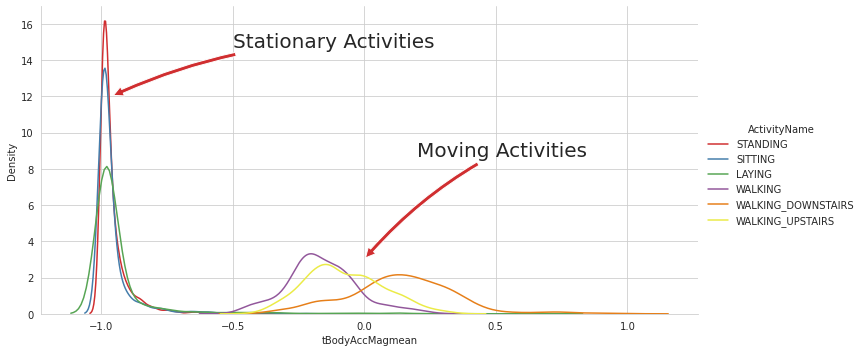

In [38]:
# desat:彩度
sns.set_palette('Set1', desat=0.80)
# hue: 色分けカテゴリ
# map(): x軸，y軸の設定，グラフの種類の関数をセット
# distplot: ヒストグラム
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5, aspect=2)
# hist: 棒グラフ表示をするか（Falseであれば，密度分布のみ）
facetgrid.map(sns.distplot, 'tBodyAccMagmean', hist=False).add_legend() # 凡例の表示
# 矢印と名前
plt.annotate('Stationary Activities', xy=(-0.96, 12), xytext=(-0.5, 15), size=20, va='center', ha='left',
            arrowprops=dict(arrowstyle='simple', connectionstyle='arc3, rad=0.1'))
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [39]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]


/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

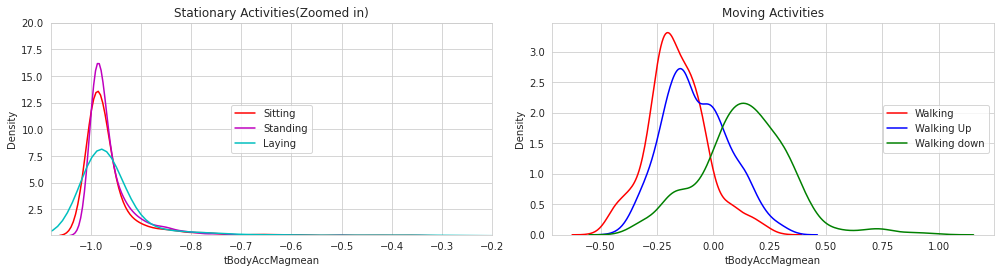

In [41]:
plt.figure(figsize=(14, 7))

# subplot: 1枚のプロットに多くのグラフを絵画
# subplot(何行に分割するか，何列に分割するか，サブ領域の番号（上から下，右から左の順）)

# Stationary Activities
plt.subplot(2, 2, 1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'], color='r', hist=False, label='Sitting')
sns.distplot(df5['tBodyAccMagmean'], color='m', hist=False, label='Standing')
sns.distplot(df6['tBodyAccMagmean'], color='c', hist=False, label='Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

# Moving Activities
plt.subplot(2, 2, 2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'], color='red', hist=False, label='Walking')
sns.distplot(df2['tBodyAccMagmean'], color='blue', hist=False, label='Walking Up')
sns.distplot(df3['tBodyAccMagmean'], color='green', hist=False, label='Walking down')
plt.legend(loc='center right')

# サブプロット間の正しい間隔を自動的に調整
plt.tight_layout()
plt.show()


### 4. Magnitude of an acceleration can saperate it well

If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.<br>
If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.<br>
If tAccMean > 0.0 then the Activity is WalkingDownstairs.<br>
<br>
75%のAcitivityラベルを分類することができますが、多少の誤差はある。

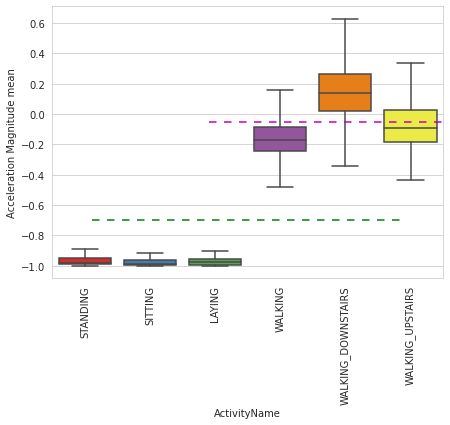

In [49]:
plt.figure(figsize=(7, 5))
# showfliers: 外れ値を表示するか
sns.boxplot(x='ActivityName', y='tBodyAccMagmean', data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes=(5, 5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5, 5), c='m')
plt.xticks(rotation=90)
plt.show()

### 5. Position of GravityAccelerationComponants also matters
> GravityAccelerationComponantsの位置も重要である。

If angleX,gravityMean > 0 then Activity is Laying.に分類できることが見てわかる

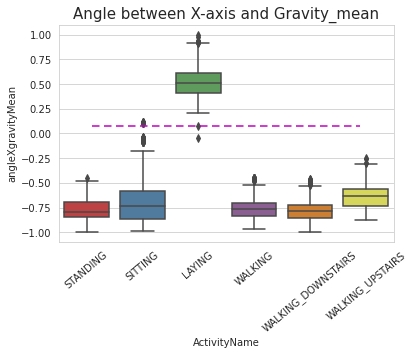

In [44]:
# 箱ひげ図
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
# 水平線を引く
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, c='m', dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
# xラベルの名前を回転
plt.xticks(rotation=40)
plt.show()

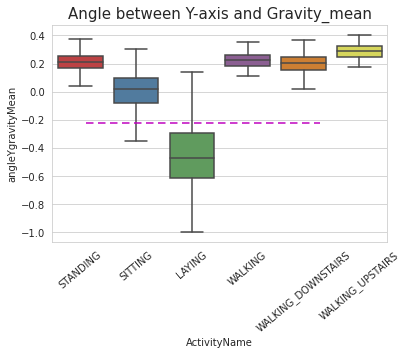

In [51]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data=train, showfliers=False,)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation=40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5, 3), c='m')
plt.show()

## Apply t-sne on the data

行動の分離性について<br>
このデータセットは参加者のアクティビティを分類するためのものである。クラスの分離可能性を調査してみよう。

### t-sneとは
[参考文献](https://qiita.com/g-k/items/120f1cf85ff2ceae4aba)
> t-SNEは高次元データを2次元又は3次元に変換して可視化するための次元削減アルゴリズム．t-SNEの最大の特徴として、数百または数千次元のデータですら無理やり2次元のデータにすることが可能．<br>
> → データの局所的な構造(類似しているデータを低次元上でも近くに保つこと)の維持を目的とした非線形次元削減技術

> 可視化したいこと<br>
<br>
あるデータ点とあるデータ点の近さ（情報量の近さ）を分類する

> 処理のポイント<br>
<br>
高次元での距離分布が低次元での距離分布にもできるだけ合致するように変換する<br>
距離の分布をスチューデンのt-分布に従うと仮定(SNEではガウス分布を仮定していたが、そこから改良された)<br>
<br>
メリット<br>
<br>
高次元の局所的な構造を非常によく捉える<br>
大局的な構造も可能な限り捉える<br>
<br>
デメリット<br>
<br>
Perplexity(内部のパラメータ)を変えると全くことなるクラスターが出現してしまう

In [52]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# performs t-sne with different perplexity（内部パラメータ） values and their repective plots
# perplexityはどれだけ近傍の点を考慮するかを決めるための値（有効な近傍点の評価の指標）

'''
Perplexityとは、どれだけ近傍の点を考慮するかを決めるためのパラメータであり、
データの局所的な特性と全体的な特性のどちらをより考慮するかというバランスを表します。

デフォルトは30であり、「5から50の間」の値を選択することが推奨されています。
'''

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    
    for index, perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplenxity {} and with {} iterations at max'.format(perplexity, n_iter))
        
        # n_components：次元数
        X_reduced = TSNE(n_components=2, verbose=2, random_state=0, perplexity=perplexity).fit_transform(X_data)
        print(X_reduced)
        print('Done 1')
        
        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization...')
        df = pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, palette='Set1', markers=['^','v','s','o', '1','2'])
        plt.title('perplexity: {} and max_iter: {}'.format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as imagge in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done 2')
        
        


performing tsne with perplenxity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...


/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 3.358s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.602448
[t-SNE] Computed conditional probabilities in 0.023s
[t-SNE] Iteration 50: error = 124.8800430, gradient norm = 0.0260085 (50 iterations in 2.268s)
[t-SNE] Iteration 100: error = 107.4171600, gradient norm = 0.0311666 (50 iterations in 1.259s)
[t-SNE] Iteration 150: error = 100.9626617, gradient norm = 0.0188805 (50 iterations in 1.182s)
[t-SNE] Iteration 200: error = 97.4441376, gra

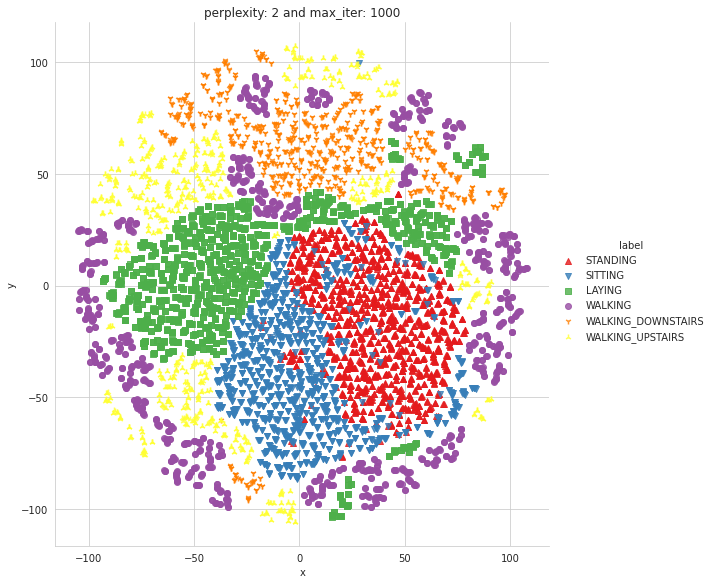

Done 2

performing tsne with perplenxity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.002s...


/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 2.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.973875
[t-SNE] Computed conditional probabilities in 0.028s
[t-SNE] Iteration 50: error = 114.0302048, gradient norm = 0.0232828 (50 iterations in 1.690s)
[t-SNE] Iteration 100: error = 97.0999298, gradient norm = 0.0156229 (50 iterations in 1.368s)
[t-SNE] Iteration 150: error = 92.5664444, gradient norm = 0.0098446 (50 iterations in 3.223s)
[t-SNE] Iteration 200: error = 90.5251160, gradi

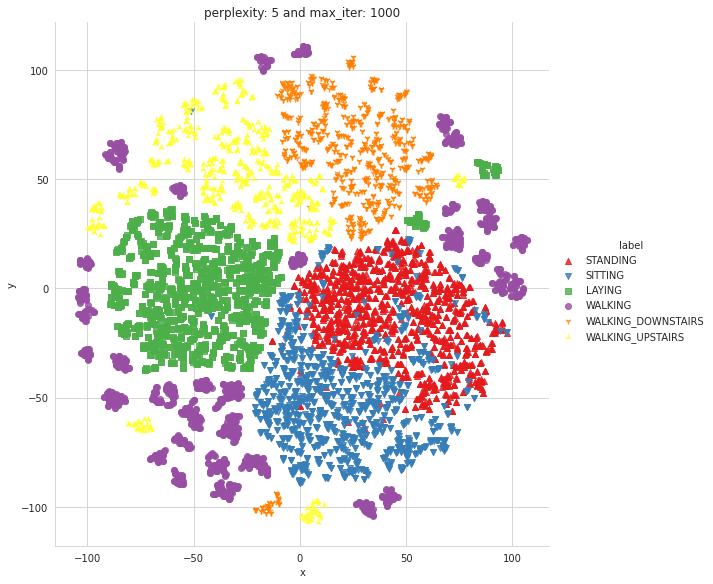

Done 2

performing tsne with perplenxity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.002s...


/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.703s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.148053
[t-SNE] Computed conditional probabilities in 0.043s
[t-SNE] Iteration 50: error = 105.7131271, gradient norm = 0.0222108 (50 iterations in 1.516s)
[t-SNE] Iteration 100: error = 89.9276352, gradient norm = 0.0111801 (50 iterations in 1.186s)
[t-SNE] Iteration 150: error = 86.8383179, gradient norm = 0.0060368 (50 iterations in 1.092s)
[t-SNE] Iteration 200: error = 85.2980499, gradi

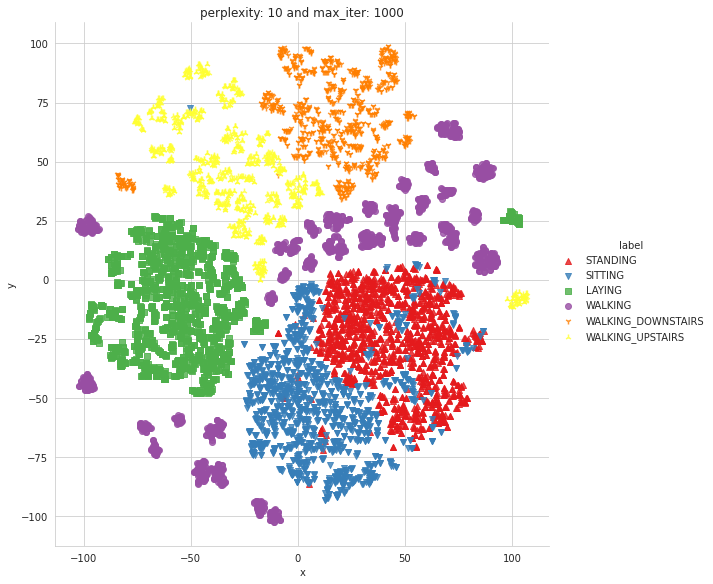

Done 2

performing tsne with perplenxity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.002s...


/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 2.533s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.291282
[t-SNE] Computed conditional probabilities in 0.112s
[t-SNE] Iteration 50: error = 97.2994766, gradient norm = 0.0231028 (50 iterations in 2.077s)
[t-SNE] Iteration 100: error = 83.1166382, gradient norm = 0.0074141 (50 iterations in 1.848s)
[t-SNE] Iteration 150: error = 80.7954636, gradient norm = 0.0053840 (50 iterations in 1.957s)
[t-SNE] Iteration 200: error = 79.9326019, gradie

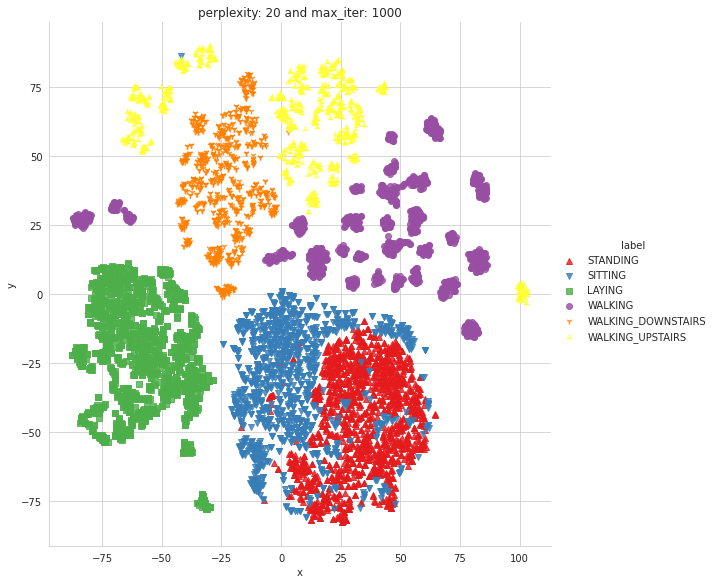

Done 2

performing tsne with perplenxity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.002s...


/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ryuseifujimoto/.asdf/installs/python/3.9.8/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 2.535s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.459019
[t-SNE] Computed conditional probabilities in 0.225s
[t-SNE] Iteration 50: error = 85.3207245, gradient norm = 0.0333446 (50 iterations in 2.479s)
[t-SNE] Iteration 100: error = 75.1908417, gradient norm = 0.0042838 (50 iterations in 2.307s)
[t-SNE] Iteration 150: error = 73.5563354, gradient norm = 0.0031114 (50 iterations in 1.923s)
[t-SNE] Iteration 200: error = 73.0655136, gradie

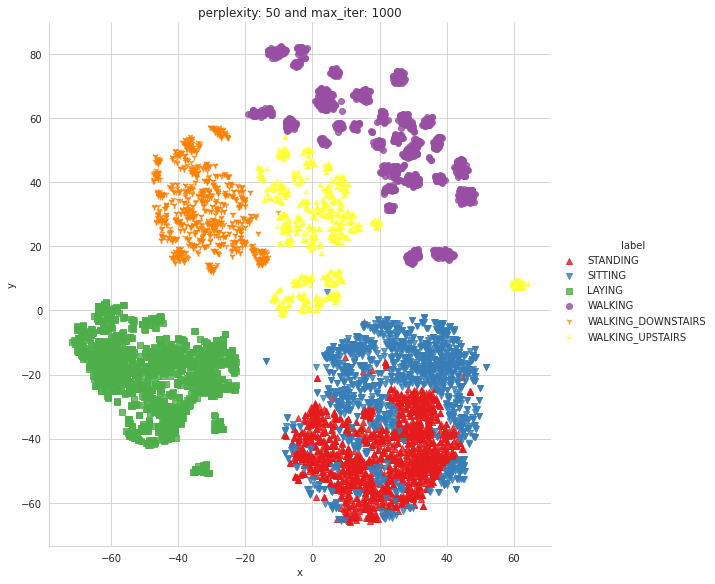

Done 2


In [58]:
# drop(): axisで列を指定(=1)して，指定カラムを削除
X_pre_tsne = train.drop(['subject', 'ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[2, 5, 10, 20, 50])